# Regex Software Services 
**Learn to create**

# Project :
***Credit Card Fraud Detection using Machine Learning And Deep Learning.***



**Team Members:**<br>
* Murari Tat (Head)<br>
* Onasvee Banarse (V.Head)<br>
* Sachin K.<br>
* Bhanu Raja<br>
* Shubham Jain<br>

**MENTOR**:<br>
* Mow Mukherjee<br>
* Pavan Tiwari<br>

<h3>Context</h3>

<p>It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.</p>

<p>The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.</p>

<p>It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.</p>

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

<h3>Acknowledgements</h3>

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

# **Importing Libraries**

In [1]:
#importing useful libraries
import math
import string
import datetime
import chardet
import warnings
warnings.filterwarnings("ignore")
import os
import scipy
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
import plotly.graph_objects as go
sns.color_palette('bright')
sns.set(style='darkgrid',rc = {'figure.figsize':(15,8)})
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline 
!pip install dataprep
%matplotlib inline

     |████████████████████████████████| 1.8 MB 277 kB/s eta 0:00:01
     |████████████████████████████████| 125 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 719 kB 25.5 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 2.0 MB/s  eta 0:00:01
     |████████████████████████████████| 848 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 743 kB 45.7 MB/s eta 0:00:01
  Created wheel for metaphone: filename=Metaphone-0.6-py3-none-any.whl size=13905 sha256=d67b0ecd3dbb42820c103a73006d09d80ef75b7683ff4dfd6d630385835f9d8d
  Stored in directory: /root/.cache/pip/wheels/1d/a8/cb/6f8902aa5457bd71344e00665c230e9c45255b3f57f2194a0f
Successfully built metaphone
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.1
    Uninstalling Jinja2-3.0.1:
      Successfully uninstalled Jinja2-3.0.1
  Attempt

# **Analysing Data**

In [2]:
#reading data sets
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
print(df.shape)

(284807, 31)


In [3]:
#checking head
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#describing the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
#droping time
df.drop('Time',axis=1,inplace=True)

In [7]:
#rechecking head
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [8]:
# checking for any NaN values
df.isna().any()

V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

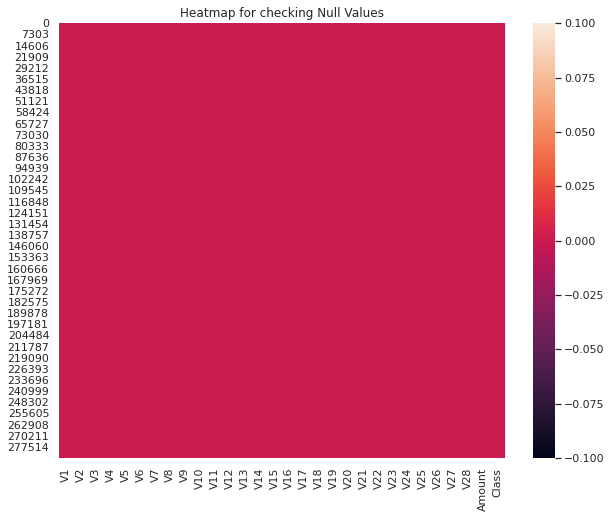

In [9]:
#visuvalising the  null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.title('Heatmap for checking Null Values')
plt.show()

no nan values

# **Visualization of Data**

  0%|          | 0/6466 [00:00<?, ?it/s]

DataPrep Report
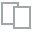
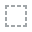
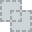
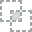
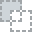
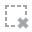
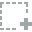
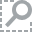
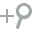
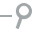
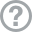
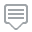
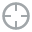
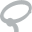
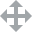
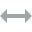
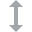
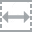
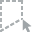
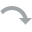
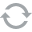
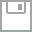
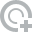
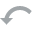
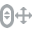
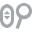
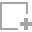
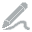
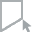
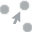
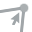
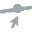

In [10]:
#visualizing using data prep library
from dataprep.eda import create_report
create_report(df)

# **Splitting Data in Training and Testing sets**

In [11]:
#assiging x and y values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#checking x value
print(X[0])
#checking y value
print(y[0])


[-1.35980713e+00 -7.27811733e-02  2.53634674e+00  1.37815522e+00
 -3.38320770e-01  4.62387778e-01  2.39598554e-01  9.86979013e-02
  3.63786970e-01  9.07941720e-02 -5.51599533e-01 -6.17800856e-01
 -9.91389847e-01 -3.11169354e-01  1.46817697e+00 -4.70400525e-01
  2.07971242e-01  2.57905802e-02  4.03992960e-01  2.51412098e-01
 -1.83067779e-02  2.77837576e-01 -1.10473910e-01  6.69280749e-02
  1.28539358e-01 -1.89114844e-01  1.33558377e-01 -2.10530535e-02
  1.49620000e+02]
0


In [12]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 69)
#printing the shapes of training and testing data
print("X_training set shape{},X_testing set shape{}".format(X_train.shape,X_test.shape))
print("y_training set shape{},y_testing set shape{}".format(y_train.shape,y_test.shape))

X_training set shape(189871, 29),X_testing set shape(94936, 29)
y_training set shape(189871,),y_testing set shape(94936,)


In [13]:
from collections import Counter
print("Before Smote")
print(Counter(y_train))

Before Smote
Counter({0: 189534, 1: 337})


In [14]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

X_train,y_train=smote.fit_resample(X_train.astype('float'),y_train.astype('int64'))

In [15]:
print("After Smote")
print(Counter(y_train))

After Smote
Counter({0: 189534, 1: 189534})


# **Feature Scaling**#standard feature scaling


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [17]:
print(X_train)

[[ 0.58302153 -0.57513554  0.74209968 ... -0.00675017  0.01407258
  -0.13508388]
 [ 0.08515113 -0.16221553  0.59519326 ... -0.64719812 -0.03645238
  -0.4203576 ]
 [ 0.14522295 -0.52782541  0.71651116 ... -0.34451721 -0.09299617
   0.70612901]
 ...
 [-2.52954579  1.7037743  -2.24256566 ... -2.546213   -2.39268532
   0.1431342 ]
 [-0.29894286  0.58394155 -0.13403072 ...  0.35188153  1.53747538
  -0.42282977]
 [ 0.09701132 -0.14839144  0.36700295 ...  0.09134938  0.36528141
   0.032284  ]]


# **Preparing Classification Models**

In [18]:
#logistic regression training
from sklearn.linear_model import LogisticRegression
classifier_regressor = LogisticRegression(random_state = 0,solver='liblinear')
classifier_regressor.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [19]:
#logistic regression prediction
y_pred_regressor = classifier_regressor.predict(X_test)

In [20]:
#knn training
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
#knn prediction
y_pred_knn = classifier_knn.predict(X_test)

In [22]:
#kernel svm training
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm.fit(X_train, y_train)

SVC(random_state=0)

In [23]:
#kernel svm prediction
y_pred_ksvm = classifier_ksvm.predict(X_test)

In [24]:
#naive bayes training
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [25]:
#naive bayes prediction
y_pred_nb = classifier_nb.predict(X_test)

In [26]:
#decision tree training
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
#decision tree prediction
y_pred_dt = classifier_dt.predict(X_test)

In [28]:
#random forest training
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
#random forest prediction
y_pred_rf = classifier_rf.predict(X_test)

In [30]:
#XG boost training
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

[14:09:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
#xg boost prediction
y_pred_xg = classifier_xg.predict(X_test)

In [32]:
y_pred=pd.DataFrame()
y_pred['knn']=y_pred_knn

In [33]:
y_pred['ksvm']=y_pred_ksvm
y_pred['navie bayes']=y_pred_nb
y_pred['decision tree']=y_pred_dt
y_pred['random forest']=y_pred_rf
y_pred['xg boost']=y_pred_xg

In [34]:
y_pred['real values']=y_test

In [35]:
y_pred

knn  ksvm  navie bayes  decision tree  random forest  xg boost  \
0        0     0            0              0              0         0   
1        0     0            1              0              0         0   
2        0     0            0              0              0         0   
3        0     0            0              0              0         0   
4        0     0            0              0              0         0   
...    ...   ...          ...            ...            ...       ...   
94931    0     0            0              0              0         0   
94932    0     0            0              0              0         0   
94933    0     0            0              0              0         0   
94934    0     0            0              0              0         0   
94935    0     0            0              0              0         0   

       real values  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
94931            0  
94932            0  
94933            0  
94934            0  
94935            0  

[94936 rows x 7 columns]

In [36]:
#confussion matrix regressor
from sklearn.metrics import confusion_matrix, accuracy_score
cm_regressor = confusion_matrix(y_test, y_pred_regressor)
print(cm_regressor)
accuracy_score(y_test, y_pred_regressor)



[[92706  2075]
 [   12   143]]


0.9780167691918766

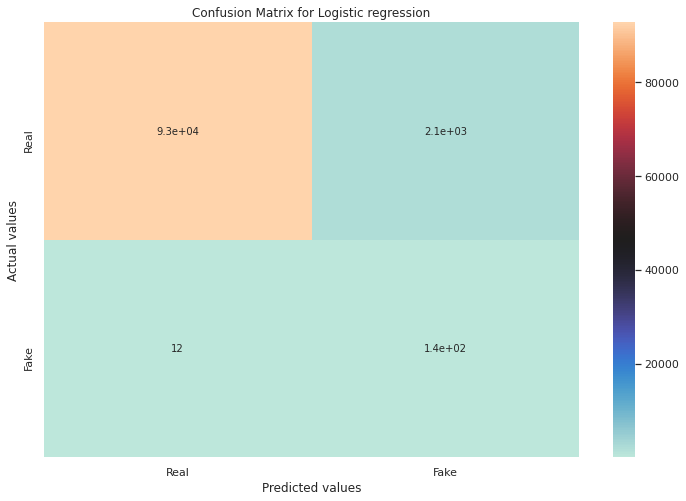

In [37]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_regressor)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

In [38]:
#confussion matrix knn
from sklearn.metrics import confusion_matrix, accuracy_score
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
accuracy_score(y_test, y_pred_knn)

[[94545   236]
 [   27   128]]


0.9972297126485211

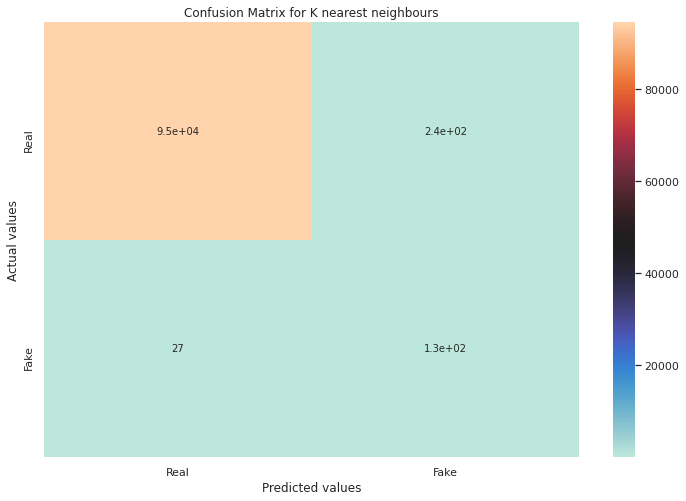

In [39]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for K nearest neighbours')
plt.show()

In [40]:
#confussion matrix ksvm
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)
accuracy_score(y_test, y_pred_ksvm)

[[94311   470]
 [   25   130]]


0.9947859610685094

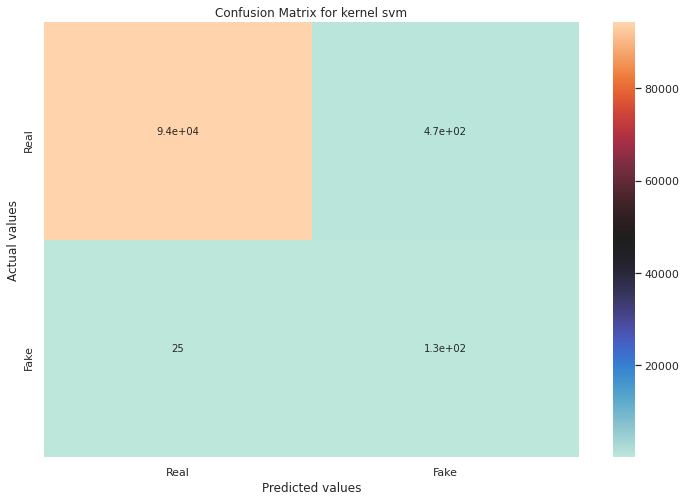

In [41]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_ksvm)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for kernel svm')
plt.show()

In [42]:
#confussion matrix navie bayes
from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
accuracy_score(y_test, y_pred_nb)

[[92222  2559]
 [   17   138]]


0.9728659307322828

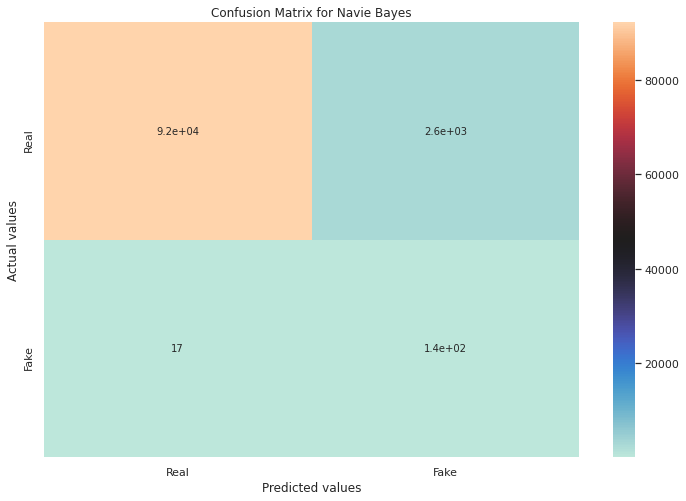

In [43]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Navie Bayes')
plt.show()

In [44]:
#confussion matrix decision tree
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
accuracy_score(y_test, y_pred_dt)

[[94590   191]
 [   31   124]]


0.9976615825398163

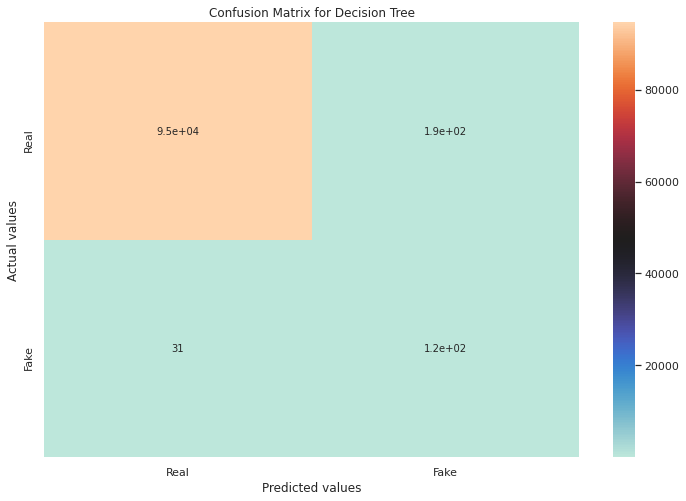

In [45]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [46]:
#confussion matrix random forest
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[94766    15]
 [   22   133]]


0.9996102637566361

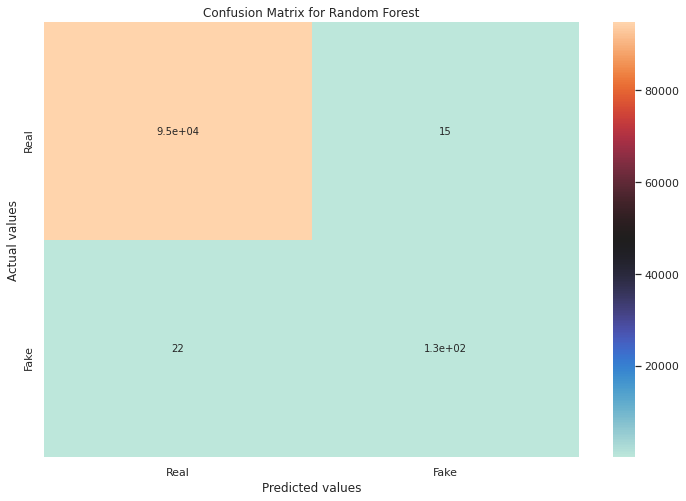

In [47]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [48]:
#confussion matrix xg boost
from sklearn.metrics import confusion_matrix, accuracy_score
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)
accuracy_score(y_test, y_pred_xg)

[[94748    33]
 [   21   134]]


0.9994311957529283

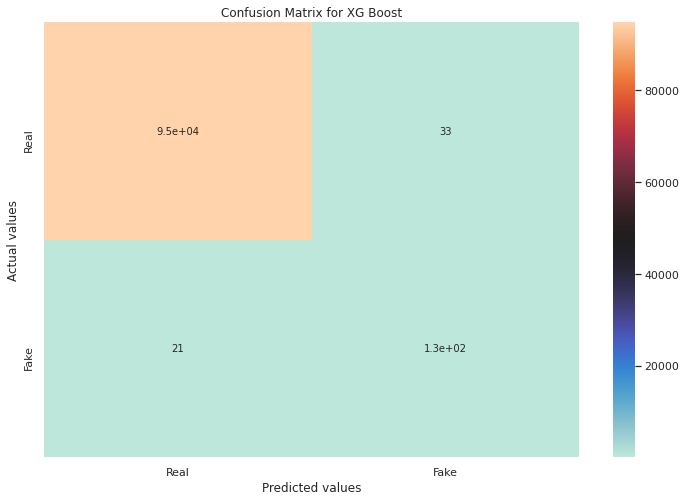

In [49]:
#visuvalizing confusion matrix
mat = confusion_matrix(y_test,y_pred_xg)
plt.figure(figsize=(12,8))
sns.heatmap(data=mat, annot=True, cmap="icefire", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for XG Boost')
plt.show()

Accuracy:
* Logestic Regression:             0.97801
* KNeighborsClassifier:            0.99722
* SVC:                             0.99478
* GaussianNB:                      0.97286
* DecisionTreeClassifier:          0.99766
* RandomForestClassifier:          0.99961
* XG Boost:                        0.99943